<a href="https://colab.research.google.com/github/hansa31/GBM-analysis/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.0 MB/s eta 0:00:00


In [4]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#import xgboost as xgb

import shap

shap.initjs()

In [10]:
from sklearn.model_selection import StratifiedKFold

In [5]:

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GBM/PreProcess_data_2_train.csv')
df.head()

,VOLUME_ET,VOLUME_NET,VOLUME_ED,VOLUME_TC,VOLUME_WT,VOLUME_BRAIN,VOLUME_ET_OVER_NET,VOLUME_ET_OVER_ED,VOLUME_NET_OVER_ED,VOLUME_ET_over_TC,...,TEXTURE_NGTDM_NET_FLAIR_Complexity,TEXTURE_NGTDM_NET_FLAIR_Strength,TGM_p1,TGM_dw,TGM_Cog_X_1,TGM_Cog_Y_1,TGM_Cog_Z_1,TGM_T_1,Age,Survival_cat
0,1662,384,36268,2046,38314,1469432,4.328125,0.045826,0.010588,0.81232,...,2203.2034,61.3293,8.00000,7.500000e-07,0.178609,0.096256,0.052741,2.0000,56.208219,HIGH
1,4362,4349,15723,8711,24434,1295721,1.002989,0.277428,0.276601,0.50075,...,1440.4285,3.5999,3.31250,1.000000e-09,0.077619,0.122900,0.094336,91.4736,61.526027,MID
2,33404,48612,45798,82016,127814,1425843,0.687155,0.729377,1.061444,0.40729,...,1147.5177,0.8048,5.78125,1.000000e-09,0.132283,0.116006,0.096035,272.4290,18.975342,HIGH
3,12114,7587,34086,19701,53787,1403429,1.596679,0.355395,0.222584,0.61489,...,3320.1690,4.7336,3.87500,1.000000e-09,0.100415,0.088249,0.096470,128.4680,33.887671,MID
4,34538,7137,65653,41675,107328,1365237,4.839288,0.526069,0.108708,0.82875,...,1834.1052,2.4532,1.00000,5.730000e-08,0.106184,0.131952,0.096894,240.7780,54.986301,LOW


In [7]:
from sklearn.preprocessing import StandardScaler

# take x data and y data from the df_noAge, and convert them to numpy arrays, y is the last column which is catogorical
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(76, 705)

Results from the previous RFE

Selected 5 features: Index(['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 6 features: Index(['HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 7 features: Index(['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 8 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 9 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'Age'],
      dtype='object')


Selected 10 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 11 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 12 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LZHGE',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T2_ZP',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 13 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_SZLGE',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 14 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_ZP', 'TEXTURE_GLSZM_NET_T2_LGZE',
       'TEXTURE_GLSZM_NET_T2_ZSV', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 15 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin6',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 16 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 17 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_NET_T1_Bin10',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 18 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_ET_T1_Bin1',
       'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_LGZE',
       'TEXTURE_GLSZM_NET_FLAIR_GLV', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 19 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1',
       'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_ET_T1_Bin5', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TEXTURE_NGTDM_ET_T1Gd_Strength',
       'TGM_T_1', 'Age'],
      dtype='object')


Selected 20 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1',
       'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4',
       'HISTO_ET_T1_Bin10', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LGZE',
       'TEXTURE_GLSZM_NET_T1_HGZE', 'TEXTURE_GLSZM_NET_T1_SZLGE',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 21 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin9', 'HISTO_NET_T1Gd_Bin10',
       'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3',
       'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin5', 'HISTO_NET_T2_Bin9',
       'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T1_ZSV',
       'TEXTURE_GLSZM_NET_T2_SZE', 'TEXTURE_GLSZM_NET_T2_LZE',
       'TEXTURE_GLSZM_NET_T2_GLN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 22 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_NET_T2_Bin9',
       'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_SZE',
       'TEXTURE_GLSZM_NET_T2_LZE', 'TEXTURE_GLSZM_NET_T2_GLN',
       'TEXTURE_GLSZM_NET_T2_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE',
       'TEXTURE_NGTDM_ET_T2_Coarseness', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 23 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin6',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE',
       'TEXTURE_GLSZM_NET_T1_LZHGE', 'TEXTURE_GLSZM_NET_T1_GLV',
       'TEXTURE_GLSZM_NET_T1_ZSV', 'TEXTURE_GLSZM_NET_T2_LZE',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')


Selected 24 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin5',
       'HISTO_ET_T1_Bin6', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2',
       'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LZHGE',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T1_ZSV',
       'TEXTURE_GLSZM_NET_T2_SZE', 'TEXTURE_GLSZM_NET_T2_LZE',
       'TEXTURE_GLSZM_NET_T2_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1',
       'Age'],
      dtype='object')


Selected 25 features: Index(['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin8', 'HISTO_NET_T1Gd_Bin9',
       'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2',
       'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin5',
       'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN',
       'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV',
       'TEXTURE_GLSZM_NET_T1_LGZE', 'TEXTURE_GLSZM_NET_T1_HGZE',
       'TEXTURE_GLSZM_NET_T1_SZLGE', 'TEXTURE_GLSZM_NET_T1_SZHGE',
       'TEXTURE_GLSZM_NET_T1_LZLGE', 'TEXTURE_GLSZM_NET_T1_LZHGE',
       'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T1_ZSV',
       'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age'],
      dtype='object')

# Selecting Columns

In [28]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age']
selected_values = X_scaled[:, [df.columns.get_loc(col) for col in valid_columns]]

# CART

In [29]:
# helper function

def fitting(X_train,X_test,y_train, y_test, criterion, splitter, mdepth, clweight, minleaf, feature_names):

    # Create training and testing samples
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

    # Fit the model
    model = tree.DecisionTreeClassifier(criterion=criterion,
                                        splitter=splitter,
                                        max_depth=mdepth,
                                        class_weight=clweight,
                                        min_samples_leaf=minleaf,
                                        random_state=0,
                                  )

    clf = model.fit(X_train, y_train)

    # Predict class labels on training data
    pred_labels_tr = model.predict(X_train)
    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)

    # Tree summary and model evaluation metrics
    print('*************** Tree Summary ***************')
    print('Classes: ', clf.classes_)
    print('Tree Depth: ', clf.tree_.max_depth)
    print('No. of leaves: ', clf.tree_.n_leaves)
    print('No. of features: ', clf.n_features_in_)
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    print('*************** Evaluation on Training Data ***************')
    score_tr = model.score(X_train, y_train)
    print('Accuracy Score: ', score_tr)
    # Look at classification report to evaluate the model
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')

    # Use graphviz to plot the tree
    dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                #class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1], str(list(clf.classes_)[2]))],
                                class_names = ['HIGH', 'LOW', 'MID'],
                                filled=True,
                                rounded=True,
                                #rotate=True,
                               )
    graph = graphviz.Source(dot_data)

    # Return relevant data for chart plotting
    #return X_train, X_test, y_train, y_test, clf, graph
    return clf, graph

FOLD 0 ******************************************
*************** Tree Summary ***************
Classes:  ['HIGH' 'LOW' 'MID']
Tree Depth:  5
No. of leaves:  17
No. of features:  10
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.5
              precision    recall  f1-score   support

        HIGH       0.00      0.00      0.00         3
         LOW       0.75      1.00      0.86         3
         MID       0.25      0.50      0.33         2

    accuracy                           0.50         8
   macro avg       0.33      0.50      0.40         8
weighted avg       0.34      0.50      0.40         8

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00        22
         LOW       1.00      1.00      1.00        28
 

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


              precision    recall  f1-score   support

        HIGH       1.00      1.00      1.00        22
         LOW       1.00      1.00      1.00        28
         MID       1.00      1.00      1.00        18

    accuracy                           1.00        68
   macro avg       1.00      1.00      1.00        68
weighted avg       1.00      1.00      1.00        68

--------------------------------------------------------
FOLD 4 ******************************************
*************** Tree Summary ***************
Classes:  ['HIGH' 'LOW' 'MID']
Tree Depth:  5
No. of leaves:  14
No. of features:  10
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.375
              precision    recall  f1-score   support

        HIGH       0.00      0.00      0.00         3
         LOW       0.33      0.67      0.44         3
         MID       1.00      0.50      0.67         2

    accuracy              

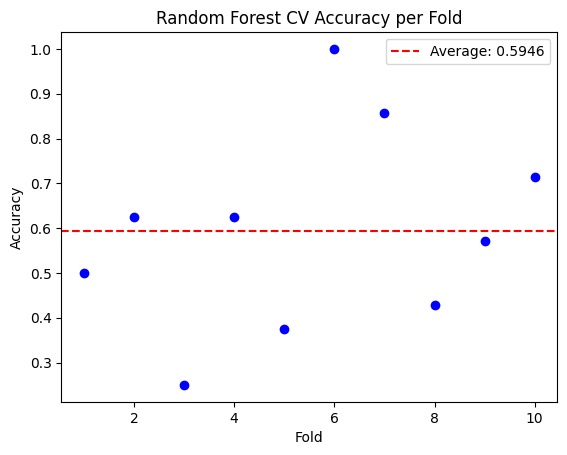

Average cross-validation accuracy: 0.5946


In [31]:
# Define number of folds for cross-validation
n_folds = 10

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_pred = np.zeros_like(y)

# Empty list to hold the graph objects
graph_list = []

# Empty list to hold the models
models_list = []

# Plot setup
fig, ax = plt.subplots()

# Iterate over folds
for fold_id, (train_index, test_index) in enumerate(skf.split(selected_values, y)):

    print(f"FOLD {fold_id} ******************************************")
    # Split data into training and testing sets
    X_train, X_test = selected_values[train_index], selected_values[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the Random Forest model
    #model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    #model.fit(X_train, y_train)

    # Create the Decision tree model
    model, graph = fitting(X_train, X_test, y_train, y_test, 'gini', 'best',
                                                       mdepth=5,
                                                       clweight=None,
                                                       minleaf=3,
                                                       feature_names = valid_columns)

    graph_list.append(graph)
    models_list.append(model)

    # Make predictions on the test set
    y_pred[test_index] = model.predict(X_test)

    # Evaluate the model using accuracy (replace with your desired metric)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, y_pred[test_index])
    scores.append(score)

    # Plot individual fold accuracy
    ax.plot([fold_id + 1], [score], marker='o', linestyle='-', color='b')

# Plot average accuracy line
avg_score = np.mean(scores)
ax.axhline(y=avg_score, color='r', linestyle='--', label=f'Average: {avg_score:.4f}')

# Customize plot
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest CV Accuracy per Fold')
ax.legend()
plt.show()

# Print the average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(scores):.4f}")

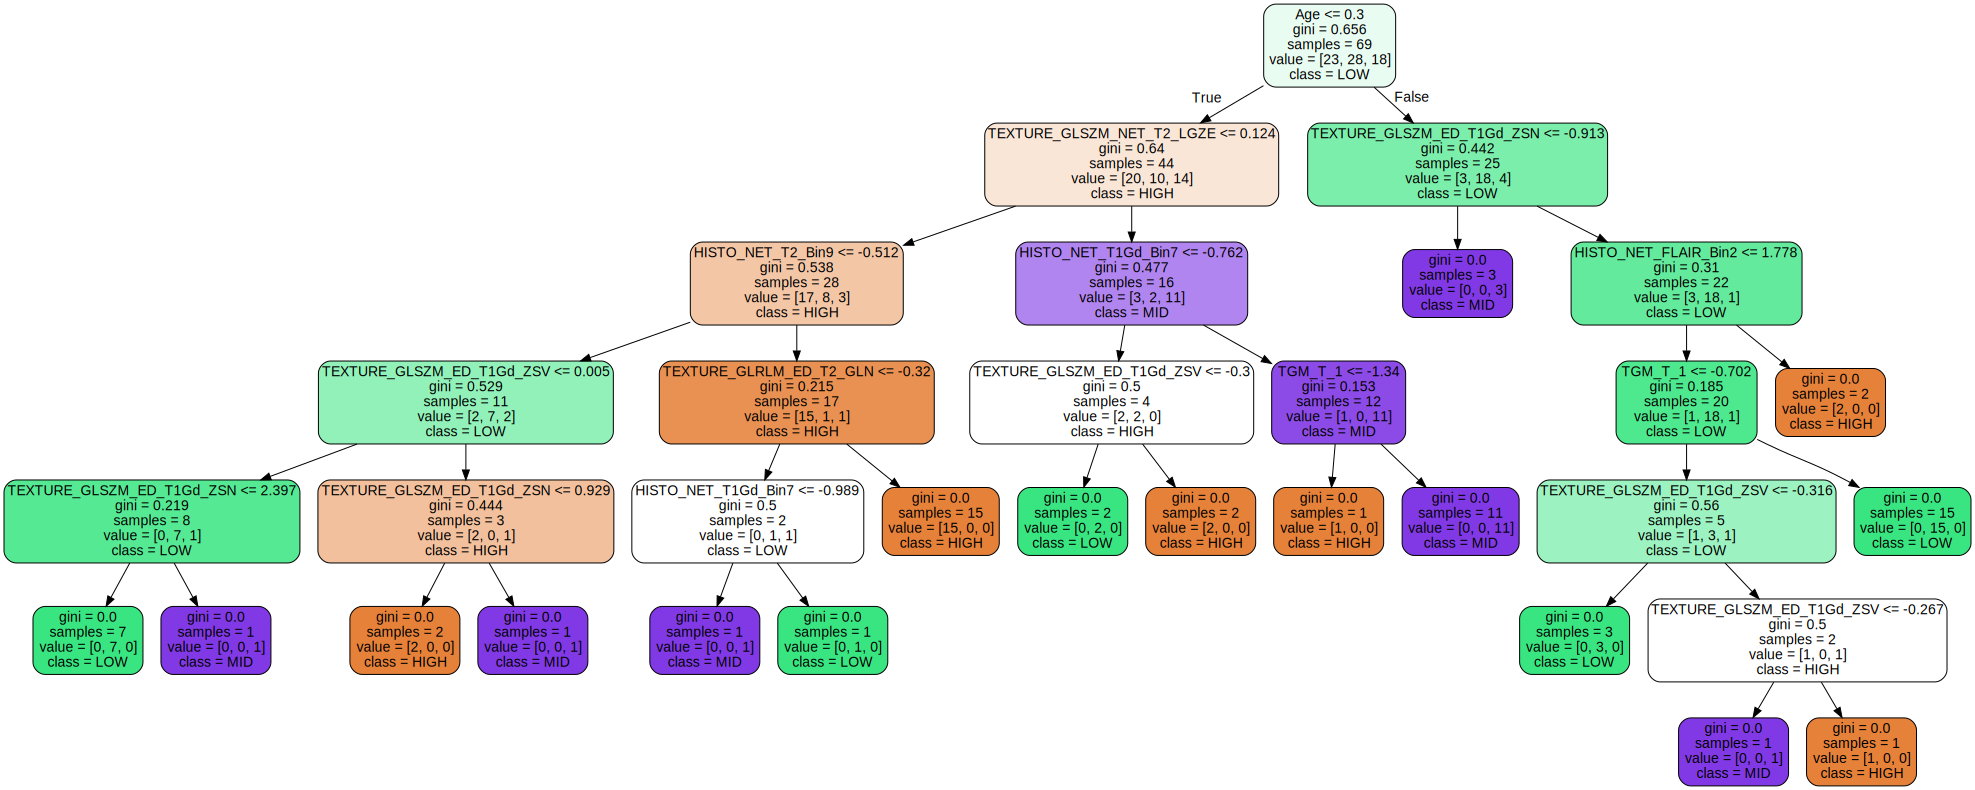

In [32]:
# just draw the graph of 6 because of the good accuracy
graph_list[6]

# SHAP ANALYSIS - Decision Tree (10)

In [74]:
model_shap = models_list[6]
#Get shap values
explainer = shap.Explainer(model_shap,feature_names=valid_columns)
shap_values= explainer(selected_values)

print(np.shape(shap_values))

(76, 10, 3)


In [39]:
model_shap.classes_

array(['HIGH', 'LOW', 'MID'], dtype=object)

In [40]:
model_shap.predict(selected_values[0,:].reshape(1,-1))

array(['HIGH'], dtype=object)

In [41]:
selected_values[0,:].reshape(1,-1)

array([[ 0.65473172, -0.77763674, -0.19608702,  0.12245697, -0.80844057,
         0.12350607,  1.82271018,  0.45563594, -1.36543217, -0.33692673]])

## Individual Waterfall Plots

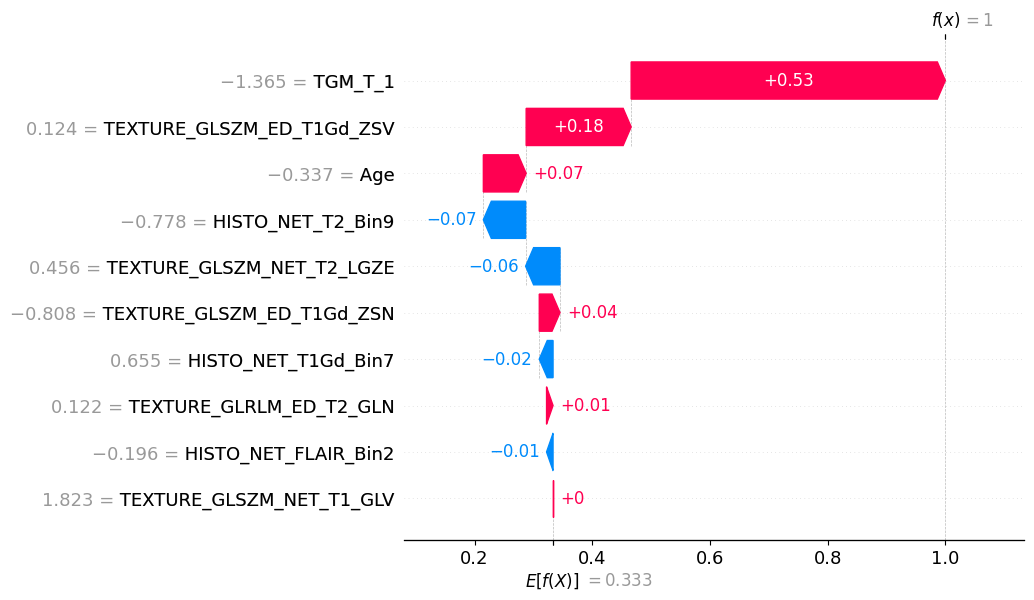

In [44]:
# waterfall plot for class 0 - HIGH
shap.plots.waterfall(shap_values[0,:,0])

# this prediction is actually high


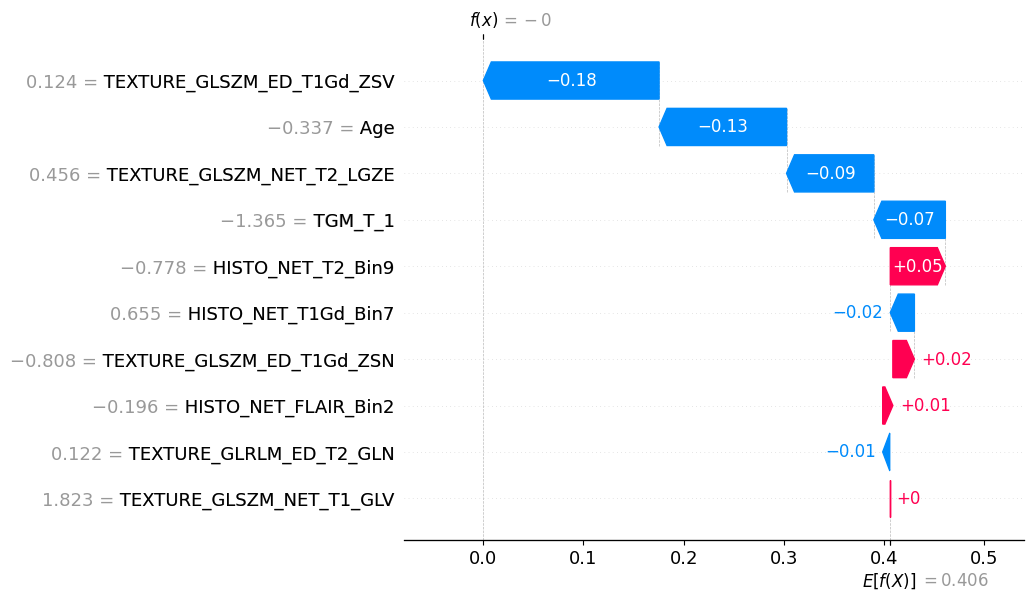

In [46]:
# waterfall plot for class 1 - LOW
shap.plots.waterfall(shap_values[0,:,1])

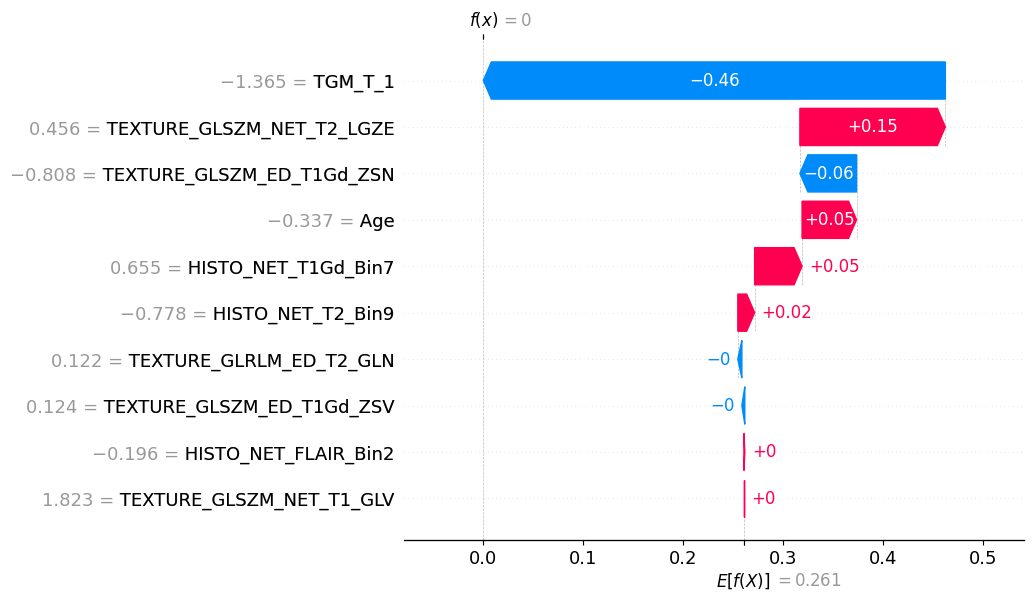

In [47]:
# waterfall plot for class 2 - MID
shap.plots.waterfall(shap_values[0,:,2])

## Mean SHAP plot

In [75]:
# calculate mean SHAP values for each class
mean_0 = np.mean(np.abs(shap_values.values[:,:,0]),axis=0)
mean_1 = np.mean(np.abs(shap_values.values[:,:,1]),axis=0)
mean_2 = np.mean(np.abs(shap_values.values[:,:,2]),axis=0)

df = pd.DataFrame({'HIGH':mean_0,'MID':mean_1,'LOW':mean_2})

df.head(10)

# plot mean SHAP values
#fig,ax = plt.subplots(1,1,figsize=(20,10))
#df.plot.bar(ax=ax)

#ax.set_ylabel('Mean SHAP',size = 30)
#ax.set_xticklabels(valid_columns,rotation=45,size=20)
#ax.legend(fontsize=30)

# This plot is no use.
# Because it skews the means with SHAP values that do not explain the predicted class.

,HIGH,MID,LOW
0,0.042897,0.044307,0.084092
1,0.135613,0.117720,0.022114
2,0.046413,0.044814,0.001599
3,0.060974,0.038223,0.022751
4,0.030779,0.075403,0.099994
5,0.091836,0.104946,0.029430
6,0.000000,0.000000,0.000000
7,0.127756,0.076918,0.177791
8,0.047713,0.052233,0.028301
9,0.148496,0.209321,0.103830


In [76]:
# get model predictions
preds = model_shap.predict(selected_values)

new_shap_values = []
for i, pred in enumerate(preds):
    if pred == 'HIGH':
      # get shap values for predicted class
      new_shap_values.append(shap_values.values[i][:,0])
    elif pred == 'MID':
      # get shap values for predicted class
      new_shap_values.append(shap_values.values[i][:,1])
    else:
      # get shap values for predicted class
      new_shap_values.append(shap_values.values[i][:,2])



In [83]:
preds

array(['HIGH', 'MID', 'HIGH', 'MID', 'LOW', 'MID', 'LOW', 'LOW', 'MID',
       'LOW', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'MID',
       'HIGH', 'LOW', 'LOW', 'MID', 'HIGH', 'HIGH', 'MID', 'LOW', 'LOW',
       'LOW', 'LOW', 'MID', 'LOW', 'HIGH', 'LOW', 'HIGH', 'LOW', 'HIGH',
       'MID', 'MID', 'HIGH', 'LOW', 'MID', 'HIGH', 'HIGH', 'LOW', 'HIGH',
       'LOW', 'HIGH', 'MID', 'LOW', 'MID', 'HIGH', 'MID', 'HIGH', 'MID',
       'LOW', 'HIGH', 'MID', 'LOW', 'HIGH', 'MID', 'LOW', 'LOW', 'MID',
       'LOW', 'LOW', 'LOW', 'LOW', 'HIGH', 'LOW', 'HIGH', 'LOW', 'MID',
       'HIGH', 'LOW', 'LOW', 'LOW'], dtype=object)

In [77]:
len(new_shap_values)

76

In [78]:
len(new_shap_values[0])

10

The above matrix/list gives the original SHAP capabilities

In [79]:
# replace shap values
shap_values.values = np.array(new_shap_values)
print(shap_values.shape)

(76, 10)


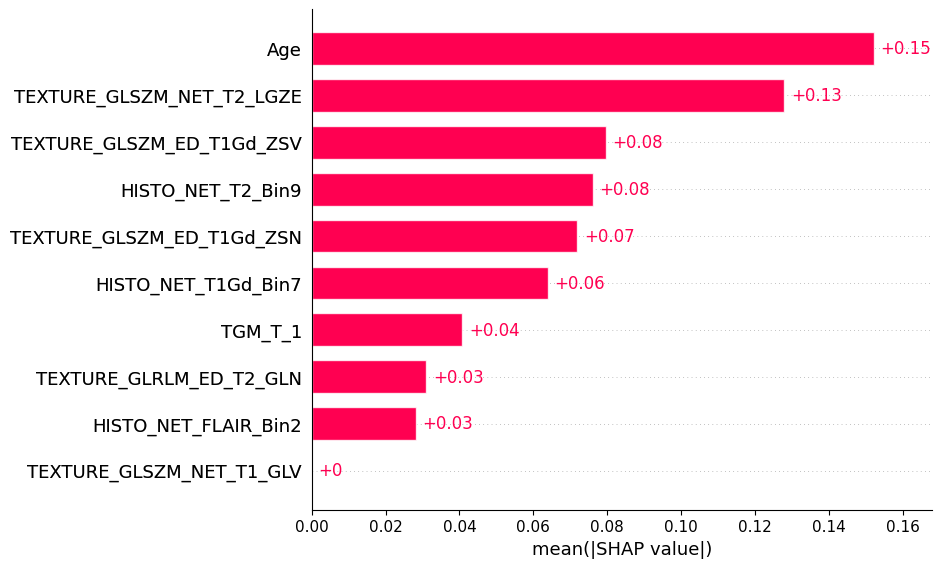

In [80]:
shap.plots.bar(shap_values)

## Beeswarmplot

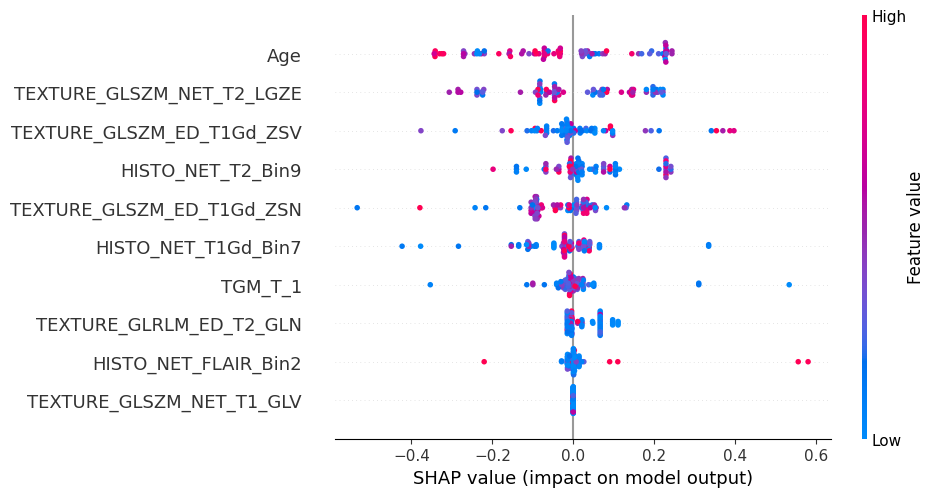

In [81]:
shap.plots.beeswarm(shap_values)

In [82]:
from collections import Counter

# Assuming 'preds' is a list or array containing predicted class labels

# Count occurrences of each class label
class_counts = Counter(preds)

# Print the number of samples in each class
for class_label, count in class_counts.items():
  print(f"Class {class_label}: {count} samples")

Class HIGH: 25 samples
Class MID: 19 samples
Class LOW: 32 samples


In [69]:
#Get shap values
explainer = shap.Explainer(model_shap,feature_names=valid_columns)
#shap_values= explainer(selected_values)

# get the beeswarm plot classwise

HIGH = []
LOW = []
MID = []
for i, pred in enumerate(preds):
    if pred == 'HIGH':
      # get shap values for predicted class
      HIGH.append(shap_values.values[i][:,0])
    elif pred == 'LOW':
      # get shap values for predicted class
      LOW.append(shap_values.values[i][:,1])
    else:
      # get shap values for predicted class
      MID.append(shap_values.values[i][:,2])

In [93]:
shap_values_HIGH= explainer(selected_values)
shap_values_MID = explainer(selected_values)
shap_values_LOW = explainer(selected_values)

In [94]:
shap_values_HIGH.values =  np.array(HIGH)
print(shap_values_HIGH.shape)

(25, 10)


In [95]:
shap_values_LOW.values =  np.array(LOW)
print(shap_values_LOW.shape)

(32, 10)


In [96]:
shap_values_MID.values =  np.array(MID)
print(shap_values_MID.shape)

(19, 10)


DimensionError: Feature and SHAP matrices must have the same number of rows!

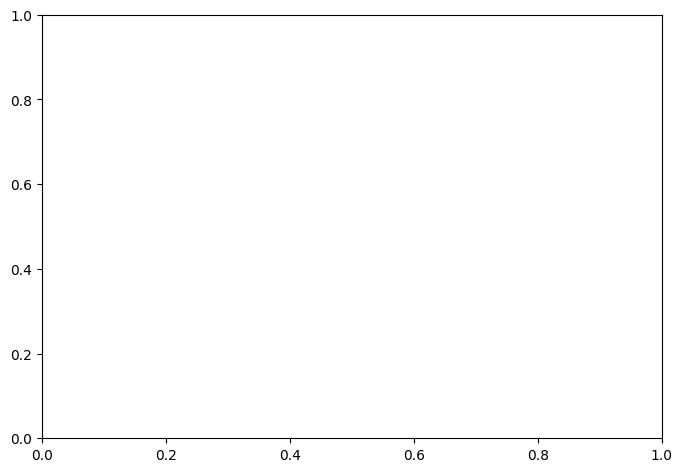

In [97]:
shap.plots.beeswarm(shap_values_HIGH)

## Stacked Force plots

In [106]:
shap.plots.force(explainer.expected_value[0], shap_values)

ValueError: visualize() can only display Explanation objects (or arrays of them)!

## Dependancy plots

In [112]:
shap_values.shape

(76, 10)

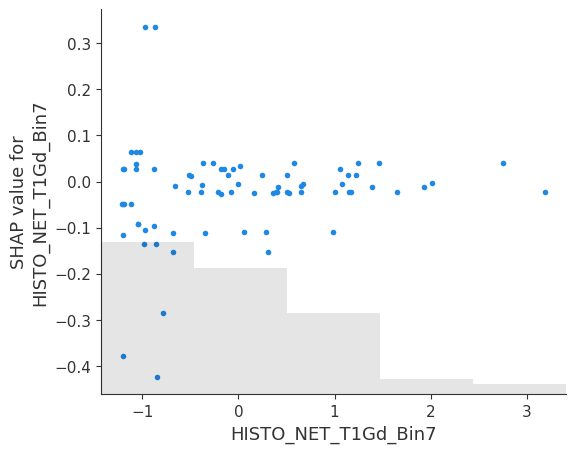

In [107]:
	shap.plots.scatter(shap_values[:,0])

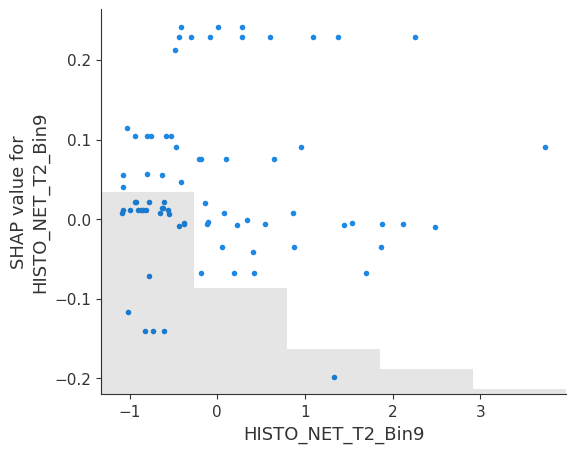

In [108]:
shap.plots.scatter(shap_values[:,1])

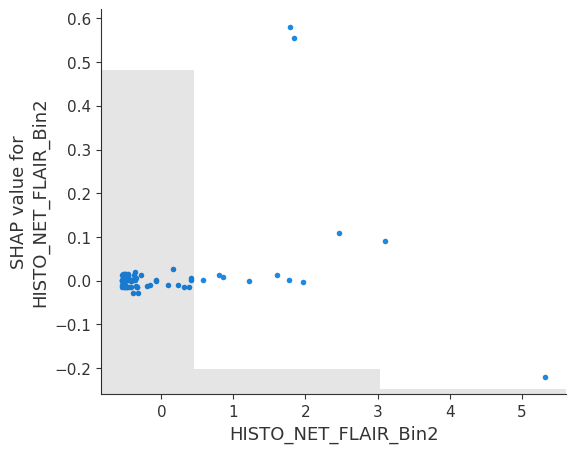

In [109]:
shap.plots.scatter(shap_values[:,2])

In [110]:
shap.plots.scatter(shap_values[:,3])

IndexError: index 3 is out of bounds for axis 1 with size 3

In [111]:
shap.plots.scatter(shap_values[:,4])

IndexError: index 4 is out of bounds for axis 1 with size 3

In [ ]:
shap.plots.scatter(shap_values[:,5])

In [ ]:
shap.plots.scatter(shap_values[:,6])

In [ ]:
shap.plots.scatter(shap_values[:,7])

In [ ]:
shap.plots.scatter(shap_values[:,8])

In [ ]:
shap.plots.scatter(shap_values[:,9])

# RF with N-Fold CV

In [5]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [13]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age']
selected_values = X[:, [df.columns.get_loc(col) for col in valid_columns]]

In [15]:
selected_values.shape

(76, 5)

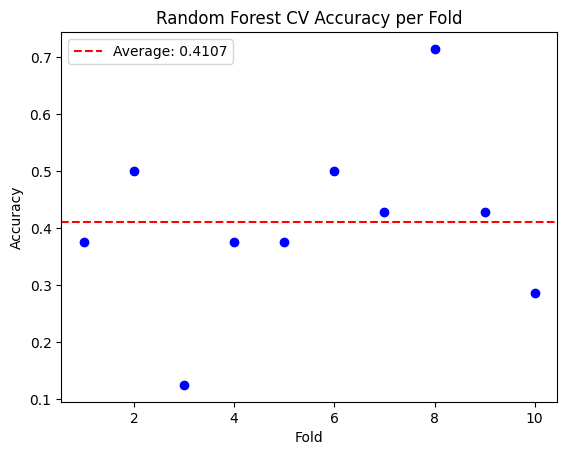

Average cross-validation accuracy: 0.4107


In [14]:
# Define number of folds for cross-validation
n_folds = 10

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_pred = np.zeros_like(y)

# Plot setup
fig, ax = plt.subplots()

# Iterate over folds
for fold_id, (train_index, test_index) in enumerate(skf.split(selected_values, y)):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred[test_index] = model.predict(X_test)

    # Evaluate the model using accuracy (replace with your desired metric)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, y_pred[test_index])
    scores.append(score)

    # Plot individual fold accuracy
    ax.plot([fold_id + 1], [score], marker='o', linestyle='-', color='b')

# Plot average accuracy line
avg_score = np.mean(scores)
ax.axhline(y=avg_score, color='r', linestyle='--', label=f'Average: {avg_score:.4f}')

# Customize plot
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest CV Accuracy per Fold')
ax.legend()
plt.show()

# Print the average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(scores):.4f}")

## with 10 features

In [18]:

valid_columns =['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_GLV', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age']
selected_values_10 = X[:, [df.columns.get_loc(col) for col in valid_columns]]

In [19]:
selected_values_10.shape

(76, 10)

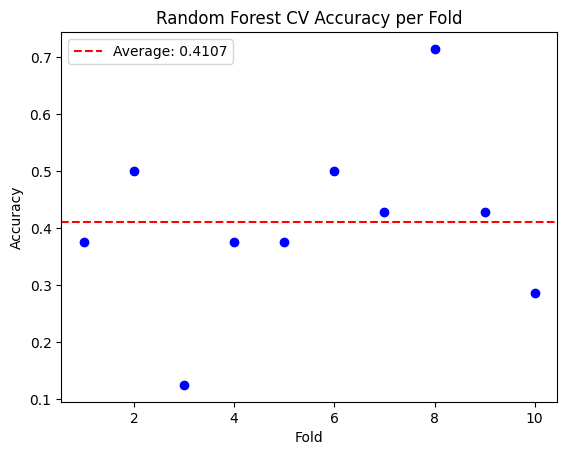

Average cross-validation accuracy: 0.4107


In [20]:
# Define number of folds for cross-validation
n_folds = 10

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize empty lists to store scores and predictions
scores = []
y_pred = np.zeros_like(y)

# Plot setup
fig, ax = plt.subplots()

# Iterate over folds
for fold_id, (train_index, test_index) in enumerate(skf.split(selected_values_10, y)):
    # Split data into training and testing sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred[test_index] = model.predict(X_test)

    # Evaluate the model using accuracy (replace with your desired metric)
    from sklearn.metrics import accuracy_score
    score = accuracy_score(y_test, y_pred[test_index])
    scores.append(score)

    # Plot individual fold accuracy
    ax.plot([fold_id + 1], [score], marker='o', linestyle='-', color='b')

# Plot average accuracy line
avg_score = np.mean(scores)
ax.axhline(y=avg_score, color='r', linestyle='--', label=f'Average: {avg_score:.4f}')

# Customize plot
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest CV Accuracy per Fold')
ax.legend()
plt.show()

# Print the average cross-validation score
print(f"Average cross-validation accuracy: {np.mean(scores):.4f}")

# SHAP + Random Forest

In [ ]:
df.columns.get_loc('VOLUME_ET')

0

In [ ]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age']
selected_values = X[:, [df.columns.get_loc(col) for col in valid_columns]]

#print(selected_values)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state =1502)
model.fit(selected_values, y)

RandomForestClassifier(n_estimators=20, random_state=1502)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.0 MB/s eta 0:00:00


In [ ]:
import shap
explainer = shap.TreeExplainer(model)

['HISTO_NET_T2_Bin9', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_NET_T2_LGZE', 'Age']

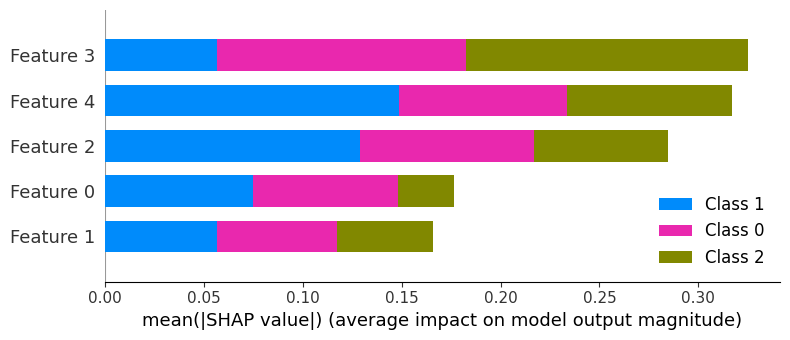

In [ ]:
#sample = selected_values.sample(25)
# Get desired sample size
n_samples = 25  # Replace with your desired number of samples
# Calculate row indices for sampling
row_indices = np.random.choice(selected_values.shape[0], size=n_samples, replace=False)  # Avoid duplicates
# Select corresponding rows from the matrix
sample= selected_values[row_indices, :]
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values,sample)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Make predictions on the training data
y_pred = model.predict(selected_values)

# Calculate and print the accuracy
accuracy = accuracy_score(y, y_pred)
print("Training accuracy:", accuracy)

Training accuracy: 1.0


with 20 features

In [ ]:
# Extract corresponding values using NumPy indexing
valid_columns = ['HISTO_NET_T1Gd_Bin7', 'HISTO_NET_T1Gd_Bin10', 'HISTO_ET_T1_Bin1', 'HISTO_ET_T1_Bin2', 'HISTO_ET_T1_Bin3', 'HISTO_ET_T1_Bin4', 'HISTO_ET_T1_Bin10', 'HISTO_NET_T2_Bin9', 'HISTO_NET_FLAIR_Bin2', 'TEXTURE_GLRLM_ED_T2_GLN', 'TEXTURE_GLSZM_ED_T1Gd_ZSN', 'TEXTURE_GLSZM_ED_T1Gd_ZSV', 'TEXTURE_GLSZM_NET_T1_LGZE', 'TEXTURE_GLSZM_NET_T1_HGZE', 'TEXTURE_GLSZM_NET_T1_SZLGE', 'TEXTURE_GLSZM_NET_T1_SZHGE', 'TEXTURE_GLSZM_NET_T1_LZLGE', 'TEXTURE_GLSZM_NET_T2_LGZE', 'TGM_T_1', 'Age']
selected_values = X[:, [df.columns.get_loc(col) for col in valid_columns]]

#print(selected_values)

In [ ]:

model = RandomForestClassifier(n_estimators=20, random_state =1502)
model.fit(selected_values, y)

RandomForestClassifier(n_estimators=20, random_state=1502)

In [ ]:
explainer = shap.TreeExplainer(model)

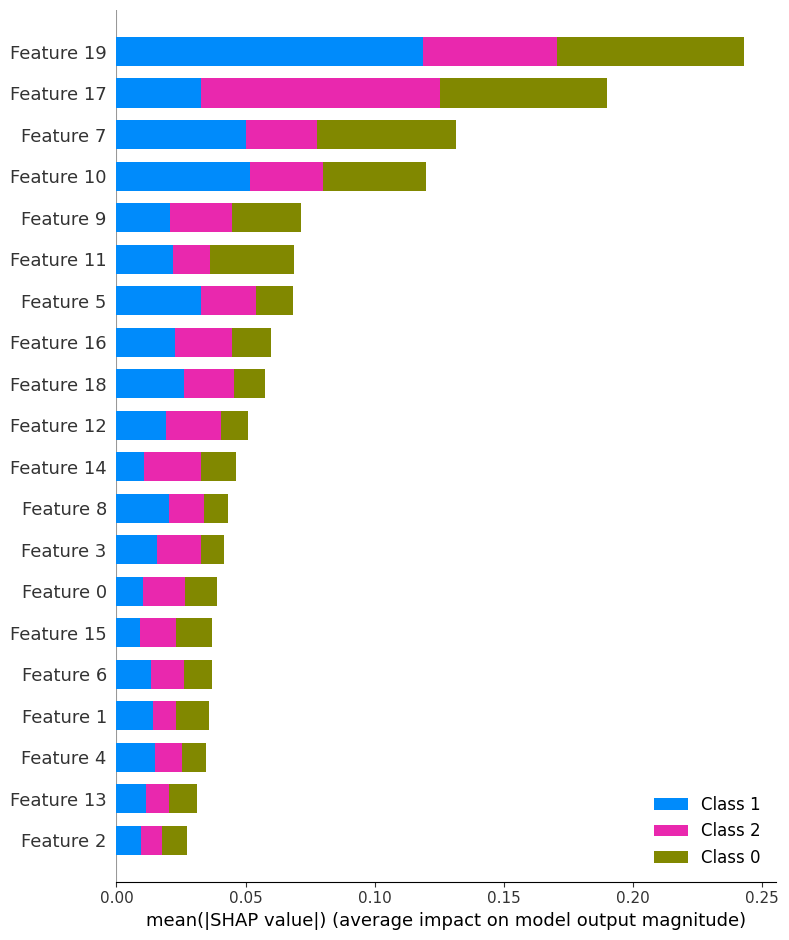

In [ ]:
#sample = selected_values.sample(25)
# Get desired sample size
n_samples = 25  # Replace with your desired number of samples
# Calculate row indices for sampling
row_indices = np.random.choice(selected_values.shape[0], size=n_samples, replace=False)  # Avoid duplicates
# Select corresponding rows from the matrix
sample= selected_values[row_indices, :]
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values,sample)

In [ ]:
valid_columns[19]

'Age'

In [ ]:
valid_columns[17]

'TEXTURE_GLSZM_NET_T2_LGZE'

In [ ]:
valid_columns[7]

'HISTO_NET_T2_Bin9'